In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defults
import seaborn as sns; sns:set()

# Working with perfectly linear dataset:

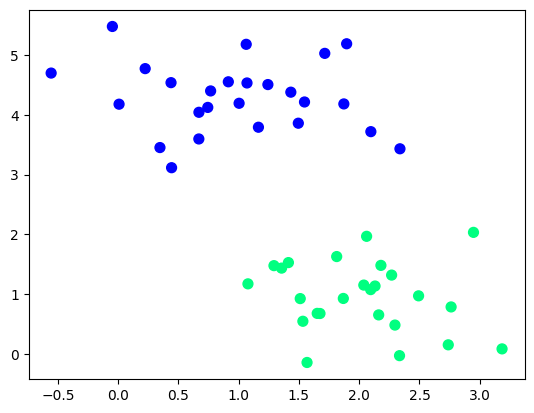

In [2]:
from sklearn.datasets._samples_generator import make_blobs
x,y=make_blobs(n_samples=50,centers=2,
               random_state=0,cluster_std=0.60)

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='winter')

In [3]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1)
model.fit(x,y)

SVC(C=1, kernel='linear')

In [4]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    '''Plot the decision function for a 2D SVC'''
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()

    # create grid to evaluate model
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    
    y,x=np.meshgrid(y,x)
    xy=np.vstack([x.ravel(),y.ravel()]).T
    p=model.decision_function(xy).reshape(x.shape)

    #plot decision boudary and margins
    ax.contour(x,y,p,colors='k',
               levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])

    # Plot Support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                model.support_vectors_[:,1],
                 s=300,linewidth=1,facecolors='None' )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

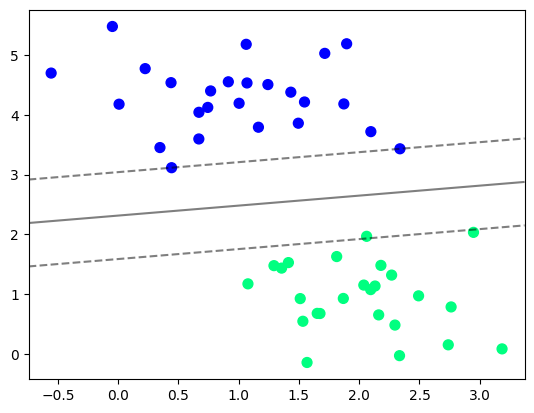

In [5]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='winter')
plot_svc_decision_function(model)

# Working with almost Linearly Seperable Dataset

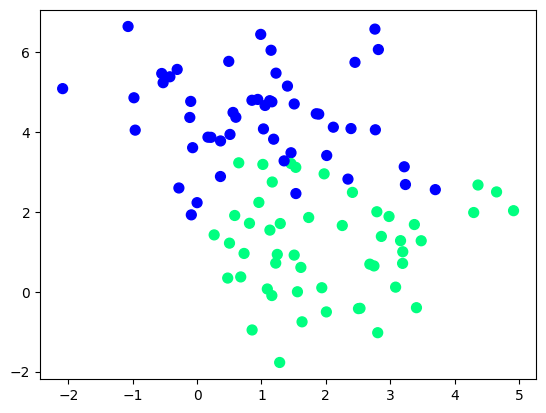

In [6]:
x,y=make_blobs(n_samples=100,centers=2,
               random_state=0,cluster_std=1.2)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='winter')

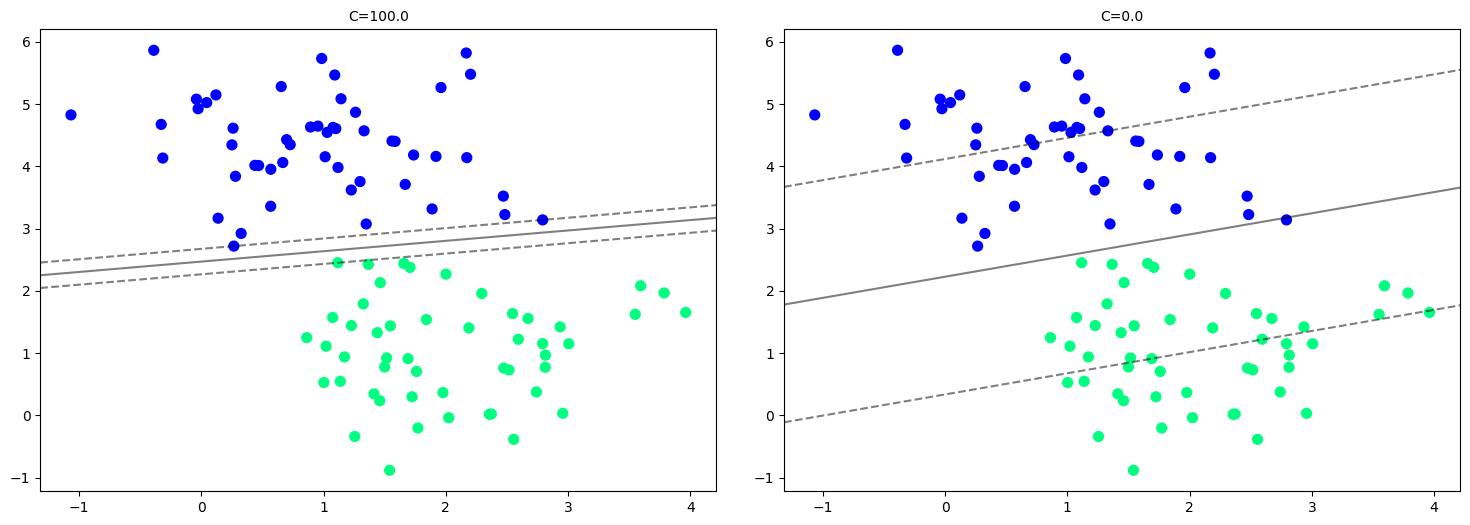

In [12]:
# Here c value changing for error analysis
x,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8)

fig ,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for axi,C in zip(ax,[100.0,0.01]):
    model=SVC(kernel='linear',C=C).fit(x,y)
    axi.scatter(x[:,0],x[:,1],c=y,s=50,cmap='winter')
    plot_svc_decision_function(model,axi)
    axi.scatter(model.support_vectors_[:,0],
                model.support_vectors_[:,1],
                s=300,lw=1,facecolor='none'
                )
    axi.set_title('C={0:.1f}'.format(C),size=10)